# Lab 8

### <span style="color:chocolate"> Submission requirements </span>

Additional points may be deducted if these requirements are not met:
    
* Comment your code
* Each graph should have a title, labels for each axis, and (if needed) a legend. Each graph should be understandable on its own
* Be sure your submitted notebook includes the output of your run (Hint: go to Kernel -> Restart Kernel and Run All Cells...)
* Try and minimize the use of the global namespace (meaning, keep things inside functions)
* Upload your .ipynb file to Gradescope when done
---

This lab introduces you to K-means Clustering

[The RGB color model](https://en.wikipedia.org/wiki/RGB_color_model) is an additive color model in which the red, green, and blue primary colors of light are added together in various ways to reproduce a broad array of colors. The name of the model comes from the initials of the three additive primary colors, red, green, and blue.

There are plenty of RBG-to-color converters on the web 
https://www.rapidtables.com/convert/color/rgb-to-hex.html

These two RGB triples look almost identical to the human eye
- [0, 0, 255]
- [0, 1, 255]

However there is no "reverse lookup" that tells you that "this color is close to blue" unless it is a [basic](https://en.wikipedia.org/wiki/Web_colors#Basic_colors) or [extended](https://en.wikipedia.org/wiki/Web_colors#Extended_colors) color with a specified RGB value.

For this assignment you are provided a file with RGB triples for a bunch of colors.

The task is to use K-means clustering to:

- group the colors into color families
- make a histogram of your color clusters to see the dsitribution of colors
- establish some human-readable names for your clusters like red, blue, yellow, etc.
- determine the centroids of the clusters
- write a function that makes the best guess of an RGB triple based on the centroids
- make some visual output to show that your guesses worked

In [ ]:
## import necessary libraries and packages
import pandas
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

## Load Data

This color data was taken from a selection of digital ad images where the goal of the project was to understand if the presence of certain colors were indicative of high performing ads.

However, before making a predictive model, it was necessary to actually classify the color of RBG triples that were present in the images.

It is important to note that if the color values were uniformly distributed there would be no value in clustering.


In [ ]:
#data_file = "rgb_colors.csv"

#loading the dataset from URL and readingi into the pandas dataframe
data_file = 'https://raw.githubusercontent.com/MIDS-W207/coursework_2022/main/Homework/rgb_colors.csv?token=GHSAT0AAAAAAB5IR55CQ55FQTRHA5EMDPIWZAG2LBQ'
df_colors = pandas.read_csv(data_file)


## Examine data

If our thesis is correct, similar colors should be near each other in the 3-dimensional RBG space.

To visualize this we can plot the RBG components and verify that this is the case.

Note that in the plot below, the full RGB triple is used to tell pandas/matplotlib what color to make each dot.

In [ ]:
# how many data points?
len(df_colors)

2030

In [ ]:
# what is in our DataFrame?
df_colors.head()

,red,green,blue
0,233,197,146
1,183,97,58
2,188,84,7
3,247,252,254
4,248,253,253


<ipython-input-31-cade16f5dcd9>:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  fig = plt.figure().gca(projection='3d')


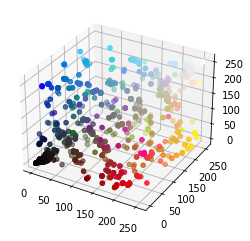

In [ ]:
# make a 3d scatter plot
colors = np.array(df_colors.values)/256 # colors need to be (r,b,g) tuple in the range of 0-1

fig = plt.figure().gca(projection='3d')
fig.scatter(df_colors.red, df_colors.green, df_colors.blue, color=colors )

### Exercise 1: Construct K-means model (4 points)

Fit a KMeans model with 10 clusters.  Be sure to use a fixed `random_state` so that you get consistent results.

Use the `predict` function to get the cluster predictions for each data point and add this to the `df_colors` DataFrame 

##### Student Solution

In [ ]:
n_clusters = 10
random_state = 10  # makes sure you get the same results each time

## get np array for RBG values
X = np.array(df_colors.values)


def fit_kmeans(X, n_clusters, random_state):
  ## YOUR CODE HERE ## 
  model = KMeans(n_clusters=n_clusters, random_state=random_state).fit(X)
  return model

model = fit_kmeans(X, n_clusters, random_state)

## get cluster prediction and add to DataFrame
df_colors['cluster'] = model.predict(X)
df_colors


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,red,green,blue,cluster
0,233,197,146,6
1,183,97,58,3
2,188,84,7,3
3,247,252,254,2
4,248,253,253,2
...,...,...,...,...
2025,27,123,141,9
2026,194,193,198,6
2027,41,113,197,9
2028,35,114,197,9


## Visualize results for K-means clustering


### Exercise 2: Plot a histogram of the distribution of clusters (4 points)

Since there are 10 clusters, using the `pandas.DataFrame.hist()` will render the correct distribution of values across each bin since 10 is the default number of bins.

Make sure that your visual output also matches the output of `Series.value_counts()`


##### Student Solution

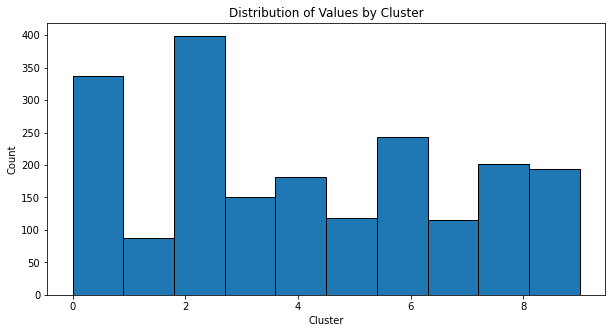



Total Count of Each Cluster:
0    338
1     88
2    399
3    151
4    181
5    119
6    244
7    115
8    201
9    194
Name: cluster, dtype: int64


In [ ]:
## plot histogram and print out number of points in each color cluster

## YOUR CODE HERE ## 
df_colors['cluster'].hist(figsize =(10,5), grid=False, ec='black')
plt.title('Distribution of Values by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

val_count = df_colors.cluster.value_counts().sort_index()
print('\n')
print('Total Count of Each Cluster:')
print(val_count)

### Examine results of clustering

<AxesSubplot:xlabel='index', ylabel='cluster'>

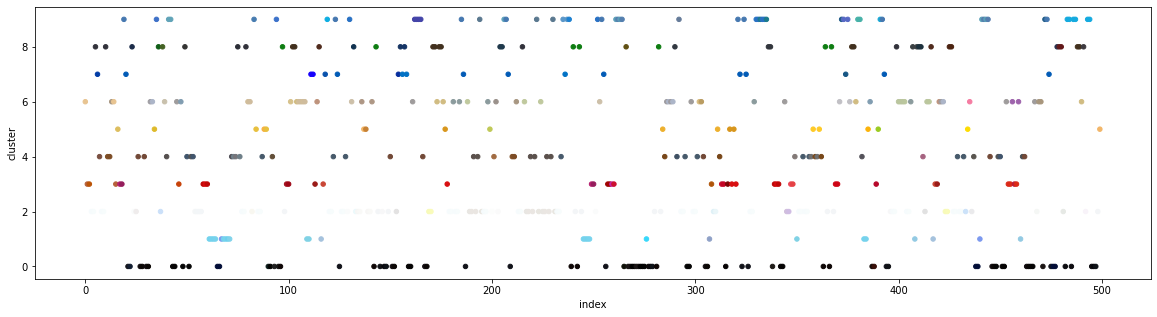

In [ ]:
# take a look at distribution of colors - only the first 500 for clarity
df_colors[:500].reset_index(drop=False).plot(x='index', y='cluster', kind='scatter', color=colors[:500], figsize=(20,5))

### Exercise 3: Establish some human-readable names for your clusters like red, blue, yellow, etc. (4 points)




##### Student Solution

In [67]:
# name your clusters

## YOUR CODE HERE ## 

color_dict = {
    0:'Black', 
    1:'Cyan',
    2:'White', 
    3:'Red',
    4:'Brown',
    5:'Yellow',
    6:'Gray',
    7:'Navy',
    8:'Green',
    9:'Blue',
    # etc etc ...
}

color_dict

{0: 'Black',
 1: 'Cyan',
 2: 'White',
 3: 'Red',
 4: 'Brown',
 5: 'Yellow',
 6: 'Gray',
 7: 'Navy',
 8: 'Green',
 9: 'Blue'}

### Exercise 4: Determine the centroids of the clusters (4 points)


##### Student Solution

In [ ]:
# get centroids

## YOUR CODE HERE ## 
centroids = model.cluster_centers_
print(centroids)

[[ 13.74260355  12.25739645  16.14201183]
 [117.68181818 203.02272727 228.02272727]
 [244.11278195 246.61904762 246.12531328]
 [192.65562914  29.58940397  38.8013245 ]
 [105.6961326   88.13259669  85.56353591]
 [224.60504202 181.31092437  42.06722689]
 [184.58606557 176.51229508 159.07377049]
 [  5.40869565  84.85217391 195.19130435]
 [ 47.96517413  65.42288557  46.38308458]
 [ 58.28865979 131.82989691 179.89690722]]


### Exercise 5: Write a function that makes the best guess of an RGB triple based on the centroids (4 points)

The  [`KMeans.predict()`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.predict) function predicts the cluster of any test data point by returning the cluster whose center is closest to the test data point.

Without using `predict()` write a function that guesses the color of an RBG triple by finding the nearest centroid.

There are many ways to calculate distance.  For this exercise it is sufficient to use a simple Euclidean distance formula.


##### Student Solution

In [ ]:
## your color guessing function
def guess_color(centroids, color_dict, test_color):

  ## YOUR CODE HERE ## 
  #Create a list with the Euclidean distance for each center in the centeroids
  euc_distances = [np.sqrt(sum(np.square(center - test_color))) for center in centroids]
  #Calculate minimum distance and save the index
  min_index = euc_distances.index(min(euc_distances))
  #Save the color name from the color dict based on index of smallest Euclidean distance
  color_name = color_dict[min_index]
  return color_name

color1 = [200, 5, 5]  # approximately red 
print(guess_color(centroids=centroids, color_dict=color_dict, test_color=color1))

Red


### Exercise 6: Write a function that returns the colors name based on the `predict()` function (4 points)


In [ ]:
def predict_color(model, color_dict, test_color):

    ## YOUR CODE HERE ## 
    color_prediction= model.predict([test_color])
    color_name = color_dict[color_prediction[0]]
    return color_name

color1 = [200, 5, 5] # approximately red 
print(predict_color(model=model, color_dict=color_dict, test_color=color1))


Red


### Exercise 7: Explainability - make some visual output to show that your guesses worked (4 points)

It is very important in data sceince, when possible, to have a "visual confirmation" that our code is working.  Think of this as an explainability exercise where you need to vefiry that your code it working.

Use `matplotlib` to make some visual out to verify that `color1` is indeed RED.

Here is an example, but anything that shows the color in a programmatic way is fine.

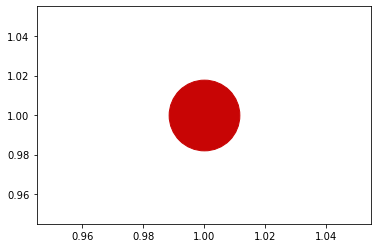




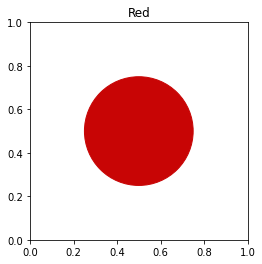

In [70]:
def show_color(test_color, color_name):

  ## do something
  fig, ax = plt.subplots()
  circle = plt.Circle((0.5,0.5), radius=0.25, color=(np.array(test_color)/255))
  ax.add_artist(circle)
  ax.set_aspect('equal')
  plt.title(color_name)
  plt.show()

color1 = [200, 5, 5] # approximately red 
color1_name = guess_color(centroids=centroids, color_dict=color_dict, test_color=color1)
show_color(color1, color1_name)

### Exercise 8: Check a range of colors (4 points)
 
Given the list of `test_colors`, predict the colors using your `guess_color` function

Comment on how good the guesses are.  Are there any unexcepted results? 


In [58]:
## generate test colors
def make_test_colors(n=3):
  test_colors = list()
  for rr in range(n+1):
    for gg in range(n+1):
      for bb in range(n+1):
        red = int(rr/n*255)
        green = int(gg/n*255)
        blue = int(bb/n*255)

        color = [red, green, blue]
        test_colors.append(color)
  test_colors = np.array(test_colors)
  return test_colors


In [68]:
test_colors = make_test_colors()

for ii,cc in enumerate(test_colors):
  ## do something clever
  # print the guess color and the RGB Value of the test color
  print(guess_color(centroids=centroids, color_dict=color_dict, test_color=cc), cc)
  
#RBG standard colors are fairly easy to remember
#Black (0,0,0)
#White (255, 255, 255)
#Red (255, 0, 0)
#Green (0, 255, 0)
#Blue (0, 0, 255)
#Yellow (255, 255, 0)
#Cyan (0, 255, 255)
#Magenta (255, 0, 255)
#Gray (128,128,128)

Black [0 0 0]
Black [ 0  0 85]
Navy [  0   0 170]
Navy [  0   0 255]
Green [ 0 85  0]
Green [ 0 85 85]
Navy [  0  85 170]
Navy [  0  85 255]
Green [  0 170   0]
Blue [  0 170  85]
Blue [  0 170 170]
Blue [  0 170 255]
Green [  0 255   0]
Blue [  0 255  85]
Blue [  0 255 170]
Cyan [  0 255 255]
Black [85  0  0]
Green [85  0 85]
Navy [ 85   0 170]
Navy [ 85   0 255]
Green [85 85  0]
Brown [85 85 85]
Blue [ 85  85 170]
Blue [ 85  85 255]
Brown [ 85 170   0]
Brown [ 85 170  85]
Blue [ 85 170 170]
Cyan [ 85 170 255]
Yellow [ 85 255   0]
Gray [ 85 255  85]
Cyan [ 85 255 170]
Cyan [ 85 255 255]
Red [170   0   0]
Red [170   0  85]
Red [170   0 170]
Blue [170   0 255]
Red [170  85   0]
Brown [170  85  85]
Gray [170  85 170]
Cyan [170  85 255]
Yellow [170 170   0]
Yellow [170 170  85]
Gray [170 170 170]
Cyan [170 170 255]
Yellow [170 255   0]
Yellow [170 255  85]
Gray [170 255 170]
White [170 255 255]
Red [255   0   0]
Red [255   0  85]
Red [255   0 170]
Gray [255   0 255]
Red [255  85   0]
Red 

## Review

After reviewing the RGB values compared to the guess color function, it appears to be a moderately accurate function. However there are some errors where colors are mislabeled: 
*   False Yellows such as (255, 255, 85) - This would be closer to Green.
*   False Grays such as (255, 170, 170) - This would be closer to Red. 
*   False Whites such as (255, 170, 255) - This would be closer to Magenta. 

The function appears to have a hard time with yellow, gray and white based on the output above. Which should raise concern as we may need to revaluate our model clusters.  


